<a href="https://colab.research.google.com/github/jongheonleee/Artificial_Intelligence/blob/master/ch_14_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
from IPython.display import Image

In [4]:
# 텐서플로의 주요 특징
# 텐서플로의 계산 그래프: 텐서플로 v2로 이전하기
# 계산 그래프 이해하기
Image(url='https://git.io/JL52v', width=500)

In [5]:
# 텐서플로 v1.x에서 그래프 만들기

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.__version__

'2.8.2'

In [6]:
## TF-v1.x 스타일
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2*(a - b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    print('결과: z =', sess.run(z))
    print('결과: z =', z.eval())

결과: z = 1
결과: z = 1


In [7]:
# TensorFlow v2로 이전하기
## TF v2 스타일
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')

z = 2*(a - b) + c
tf.print('결과: z =', z)

결과: z = 1


In [8]:
# 입력 데이터를 모델에 주입하기: 텐서플로 v1.x 스타일
## TF-v1.x 스타일

g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_c')
    z = 2*(a - b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print('결과: z =', sess.run(z, feed_dict=feed_dict))

결과: z = 1


In [9]:
# 입력 데이터를 모델에 주입하기: 텐서플로 v2 스타일
## TF-v2 스타일
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('스칼라 입력:', compute_z(1, 2, 3))
tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 2 입력:', compute_z([[1]], [[2]], [[3]]))

스칼라 입력: 1
랭크 1 입력: [1]
랭크 2 입력: [[1]]


In [10]:
# 함수 데코레이터로 계산 성능 높이기
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('스칼라 입력:', compute_z(1, 2, 3))
tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 2 입력:', compute_z([[1]], [[2]], [[3]]))

스칼라 입력: 1
랭크 1 입력: [1]
랭크 2 입력: [[1]]


In [11]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 1 입력:', compute_z([1, 2], [2, 4], [3, 6]))

랭크 1 입력: [1]
랭크 1 입력: [1 2]


In [12]:
tf.TensorSpec(shape=[None], dtype=tf.int32)

TensorSpec(shape=(None,), dtype=tf.int32, name=None)

In [13]:
# 모델 파라미터를 저장하고 업데이트하기 위한 텐서플로 변수 객체

a = tf.Variable(initial_value=3.14, name='var_a')
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
d = tf.Variable(initial_value=['abc'], dtype=tf.string)
print(a)
print(b)
print(c)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [14]:
a.trainable

True

In [15]:
w = tf.Variable([1, 2, 3], trainable=False)

print(w.trainable)


False


In [16]:
print(w.assign([3, 1, 4], read_value=True))
w.assign_add([2, -1, 2], read_value=False)

print(w.value())

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>
tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [17]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()

tf.print(init(shape=(3,)))

[-0.722795904 1.01456821 0.251808226]


In [18]:
v = tf.Variable(init(shape=(2, 3)))
tf.print(v)

[[0.28982234 -0.782292783 -0.0453658961]
 [0.960991383 -0.120003454 0.708528221]]


In [19]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 2)), trainable=False)
                
m = MyModule()
print('모든 변수: ', [v.shape for v in m.variables])
print('훈련 가능한 변수:   ', [v.shape for v in 
                        m.trainable_variables])


모든 변수:  [TensorShape([2, 3]), TensorShape([1, 2])]
훈련 가능한 변수:    [TensorShape([2, 3])]


In [20]:
import tensorflow as tf

tf.random.set_seed(1)
w = tf.Variable(tf.random.uniform((3, 3)))
print(w.shape)

for i in range(3):
  for j in range(3):
    print(w[i][j])

@tf.function
def compute_z(x):
  return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype=tf.float32)
print(x.shape)

for i in range(3):
  for j in range(1):
    print(x[i][j])

    
tf.print(compute_z(x))

(3, 3)
tf.Tensor(0.16513085, shape=(), dtype=float32)
tf.Tensor(0.9014813, shape=(), dtype=float32)
tf.Tensor(0.6309742, shape=(), dtype=float32)
tf.Tensor(0.4345461, shape=(), dtype=float32)
tf.Tensor(0.29193902, shape=(), dtype=float32)
tf.Tensor(0.64250207, shape=(), dtype=float32)
tf.Tensor(0.9757855, shape=(), dtype=float32)
tf.Tensor(0.43509948, shape=(), dtype=float32)
tf.Tensor(0.6601019, shape=(), dtype=float32)
(3, 1)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
[[3.8610158]
 [2.94593048]
 [3.82629013]]


In [21]:
# 자동 미분과 GradientTape을 사용해 그레이디언트 계산하기
# 훈련 가능한 변수에 대한 손실의 그레이디언트 계산하기

import tensorflow as tf

w = tf.Variable(1.0)
b = tf.Variable(0.5)

print(w, b)
print(w.trainable, b.trainable)
print('----------------------')

x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

print(x, y)


with tf.GradientTape() as tape:
  z = tf.add(tf.multiply(w, x), b)
  loss = tf.reduce_sum(tf.square(y-z))

tf.print(z)

dloss_dw = tape.gradient(loss, w)
tf.print('dL/dw : ', dloss_dw)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>
True True
----------------------
tf.Tensor([1.4], shape=(1,), dtype=float32) tf.Tensor([2.1], shape=(1,), dtype=float32)
[1.9]
dL/dw :  -0.559999764


In [22]:
# 계산된 그레디언트 확인
tf.print(2*x*(w*x+b-y))

[-0.559999764]


In [23]:
# 훈련하지 않는 변수에 대한 그레이디언트 계산하기
# tape.watch()를 사용해 훈련하지 않는 텐서를 모니터링합니다

with tf.GradientTape() as tape:
  tape.watch(x)
  z = tf.add(tf.multiply(w, x), b)
  loss = tf.square(y - z)

dloss_dx = tape.gradient(loss, x)
tf.print('dL/dx : ', dloss_dx)

dL/dx :  [-0.399999857]


In [24]:
# 계산된 그레이디언트 검증
tf.print(2*w * ((w*x + b) - y))

[-0.399999857]


In [25]:
# 여러 개의 그레이디언트 계산하기
# persistent=True를 사용합니다.

with tf.GradientTape(persistent=True) as tape:
  z = tf.add(tf.multiply(w, x), b)
  loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)
dloss_db = tape.gradient(loss, b)

tf.print('dL/dw:', dloss_dw)
tf.print('dL/db', dloss_db)

dL/dw: -0.559999764
dL/db -0.399999857


In [26]:
# 변수 업데이트: optimizer.apply_gradients()

optimizer = tf.keras.optimizers.SGD()

for i, j in zip([dloss_dw, dloss_db], [w, b]):
  print(i, j)

optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('업데이트된 w:', w)
tf.print('업데이트된 b:', b)


tf.Tensor(-0.55999976, shape=(), dtype=float32) <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
tf.Tensor(-0.39999986, shape=(), dtype=float32) <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>
업데이트된 w: 1.0056
업데이트된 b: 0.504


In [27]:
# 케라스 API를 사용해 간단하게 일반적인 구조 구현하기

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# 변수 지연 생성

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [28]:
for v in model.variables:
  print('{:20s}'.format(v.name), v.trainable, v.shape)

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


In [29]:
# 첫 번째 층에 커널과 절편 변수의 초기화를 지정
# 두 번째 층에서 커널(가중치 행렬)에 L1 규제를 지정함

model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=16,
        activation=tf.keras.activations.relu,
        kernel_initializer = tf.keras.initializers.GlorotNormal(),
        bias_initializer = tf.keras.initializers.Constant(2.0)
    )
)

model.add(
    tf.keras.layers.Dense(
        units = 32,
        activation = tf.keras.activations.sigmoid,
        kernel_regularizer = tf.keras.regularizers.l1)
    )

model.build(input_shape= (None, 4))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [30]:
# SGD 옵티마이저, 이진 분류를 위한 크로스 엔트로피 손실 함수를 사용하고 정확도, 정밀도, 재현율을 
# 사용해서 모델을 컴파일함

model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = [tf.keras.metrics.Accuracy(),
               tf.keras.metrics.Precision(),
               tf.keras.metrics.Recall(),]
)

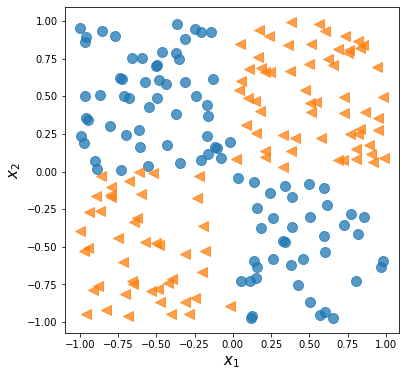

In [31]:
# XOR 분류 문제 풀어보기

tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))

y[x[:, 0] * x[:, 1] < 0] = 0

x_train = x[:100, :]
y_train = y[:100]

x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))

plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)

plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)

plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()



In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1,
                                input_shape = (2,),
                                activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])


In [34]:
hist = model.fit(x_train, y_train,
                 validation_data = (x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


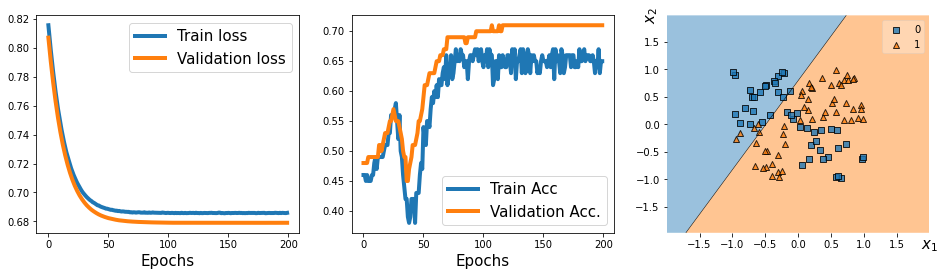

In [35]:
from mlxtend.plotting import plot_decision_regions

history = hist.history


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)

plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

plt.show()

In [36]:
tf.random.set_seed(1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

# 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])

# 훈련
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

history = hist.history


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  app.launch_new_instance()


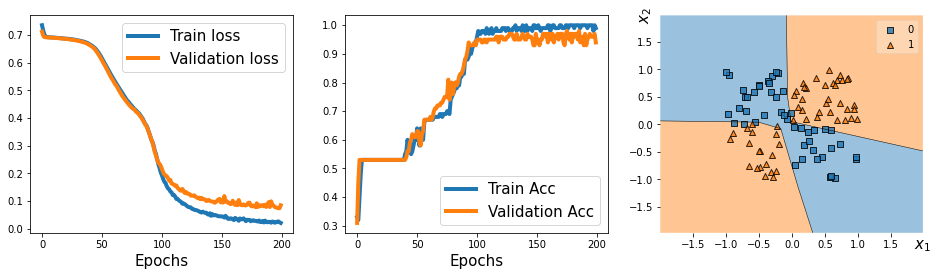

In [37]:
fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc', 'Validation Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

plt.show()

In [38]:
# 케라스 함수형 API로 유연성이 높은 모델 만들기

tf.random.set_seed(1)

# 입력층
inputs = tf.keras.Input(shape=(2,))

# 은닉층
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

# 출력층
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

# 모델 만들기
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


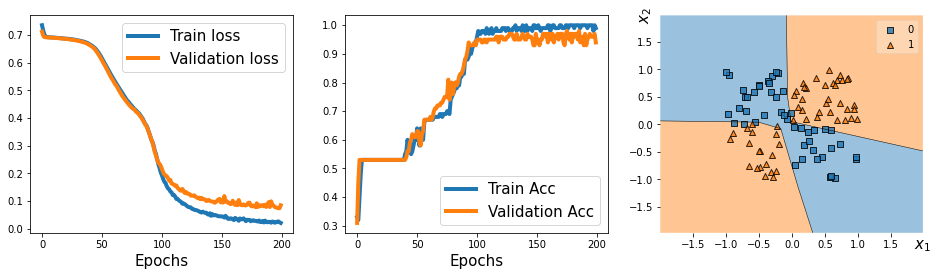

In [39]:
# 컴파일 
model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# 훈련
hist = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=200, batch_size=2, verbose=0
)


# 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))


ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc', 'Validation Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf = model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            multiple                  12        
                                                                 
 dense_14 (Dense)            multiple                  20        
                                                                 
 dense_15 (Dense)            multiple                  20        
                                                                 
 dense_16 (Dense)            multiple                  5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


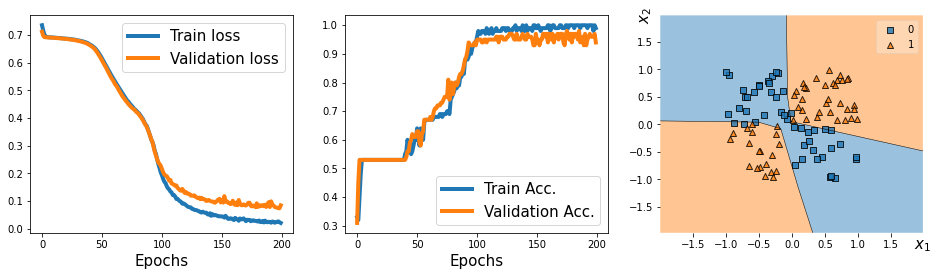

In [40]:
# 케라스의 Model 클래스 기반으로 모델 만들기
# tf.keras.Model 클래스 상속
# __init__() 구현
# call() 구현


class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, inputs):
      h = self.hidden_1(inputs)
      h = self.hidden_2(h)
      h = self.hidden_3(h)

      return self.output_layer(h)

tf.random.set_seed(1)

# 테스트
model = MyModel()
model.build(input_shape = (None, 2))

model.summary()

# 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# 훈련
hist = model.fit(x_train, y_train,
                 validation_data = (x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

# 그래프 그리기

histroy = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()


In [41]:
class MyCustomStepModel(MyModel):
  def train_step(self, data):
    # fit()에서 전달된 데이터
    x, y = data

    # 그레이디언트 기록 시작
    with tf.GradientTape() as tape:
      # 정방향 계산 
      y_pred = self(x)
      # compile() 메서드에서 지정한 손실 계산
      loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
    
    # 훈련 가능한 파라미터에 대한 그레이디언트 계산
    gradients = tape.gradient(loss, self.trainable_variables)
    # 파라미터 업데이트
    self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

    self.compiled_metrics.update_state(y, y_pred)

    # 현재까지 지표와 결과값을 딕셔너리로 반환
    return {m.name: m.resault() for m in self.metrics}

  



In [52]:
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights',
                                 shape=(input_shape[1], self.output_dim),
                                 initializer='random_normal',
                                 trainable=True)
        
        self.b = self.add_weight(shape=(self.output_dim,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim),
                                     mean=0.0,
                                     stddev=self.noise_stddev)

            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim': self.output_dim,
                       'noise_stddev': self.noise_stddev})
        return config


## 테스트

tf.random.set_seed(1)

noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))

x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

## 설정을 사용해 모델 만들기
config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

[[0 0.00821428 0 0]]
[[0 0.0108502861 0 0]]


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noisy_linear_9 (NoisyLinear  (None, 4)                12        
 )                                                               
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


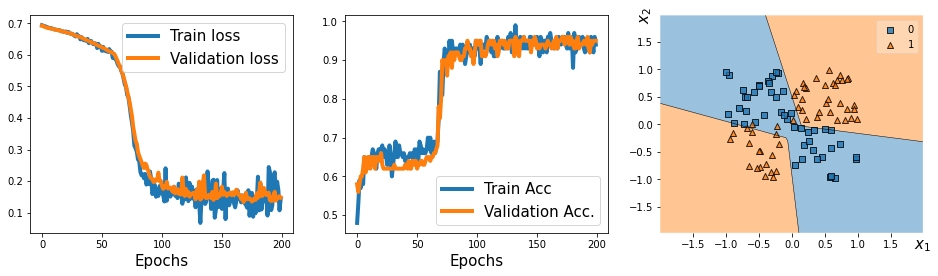

In [53]:
tf.random.set_seed(1)

model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.build(input_shape=(None, 2))
model.summary()

# 컴파일 
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

# 훈련
hist = model.fit(x_train, y_train,
                 validation_data = (x_valid, y_valid),
                 epochs=200, batch_size=2,
                 verbose=0)

# 그래프 그리
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf = model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

plt.show()